# **Predictive Maintenence**

Machine failures in industrial operations lead to costly unplanned downtime and disrupted workflows. This project aims to harness sensor data, including metrics such as temperature, rotational speed, torque, and tool wear, to predict potential failures before they occur. By implementing predictive maintenance techniques, the solution will enable businesses to anticipate maintenance needs, reduce unexpected breakdowns, and improve overall operational efficiency and cost-effectiveness.

# **1. EDA**

In [97]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#Importing Dataset

df = pd.read_excel('/content/Maintenance.xlsx')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [99]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [100]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [101]:
df.shape

(10000, 14)

In [102]:
df.dtypes

,0
UDI,int64
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Machine failure,int64
TWF,int64


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [104]:
df.describe()  #Getting summary statistics of numerical columns

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [105]:
df.isnull().sum()    #checking missing values

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


In [106]:
#Checking for duplicate rows
df.duplicated().sum()

0

<ipython-input-107-063ed5d2747b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='Set2')  # Create boxplot for each numerical column
<ipython-input-107-063ed5d2747b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='Set2')  # Create boxplot for each numerical column
<ipython-input-107-063ed5d2747b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='Set2')  # Create boxplot for each numerical column
<ipython-input-107-063ed5d2747b>:8: FutureWarning: 

Passing `palette` wi

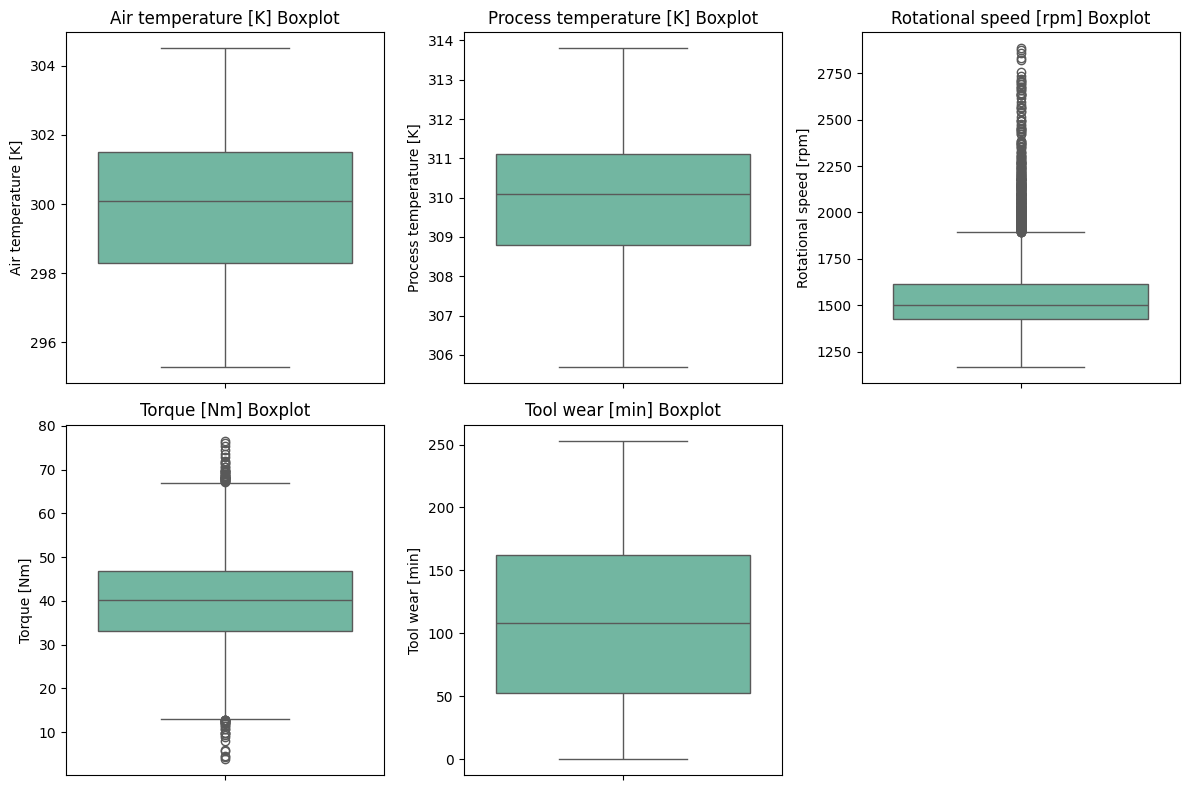

In [107]:
#Detecting outliers using Boxplot

numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=col, palette='Set2')  # Create boxplot for each numerical column
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

- Outliers are evident in features such as Torque [Nm] and Rotational speed [rpm], as shown by data points outside the whiskers.

- The spread of Air Temperature [K] and Process Temperature [K] values is relatively consistent, with fewer extreme values.

In [108]:
#Handling outliers by replacing them with the upper and lower bounds (Winsorization)

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

    return df

numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for column in numerical_columns:
    df = handle_outliers(df, column)

In [109]:
df.shape

(10000, 14)

<ipython-input-110-d0b186bff869>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='Set2')
<ipython-input-110-d0b186bff869>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='Set2')
<ipython-input-110-d0b186bff869>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='Set2')
<ipython-input-110-d0b186bff869>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

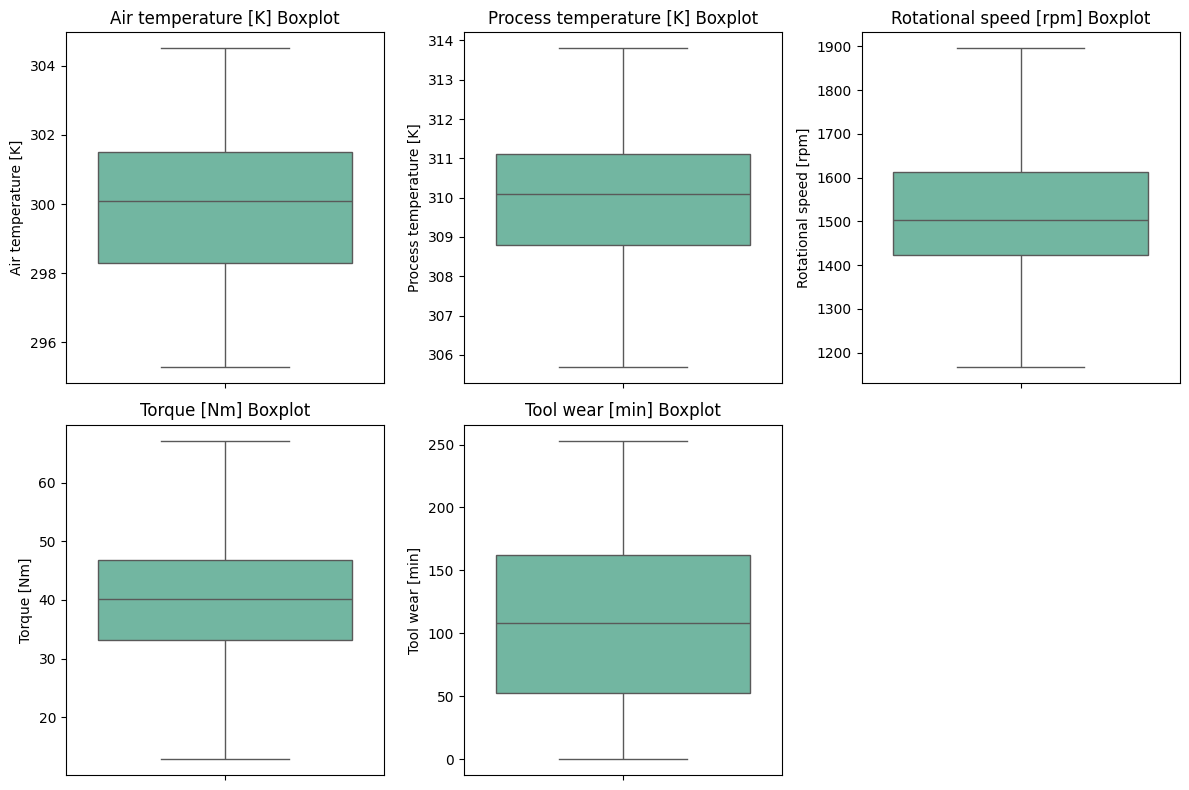

In [110]:
#Boxplot after handling outliers

numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=col, palette='Set2')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

Conclusion :

Winsorizing outliers makes analysis more robust by limiting the influence of extreme values, without removing data points entirely. This improves the reliability of results, especially for models sensitive to outliers.

# **2. Visualization**

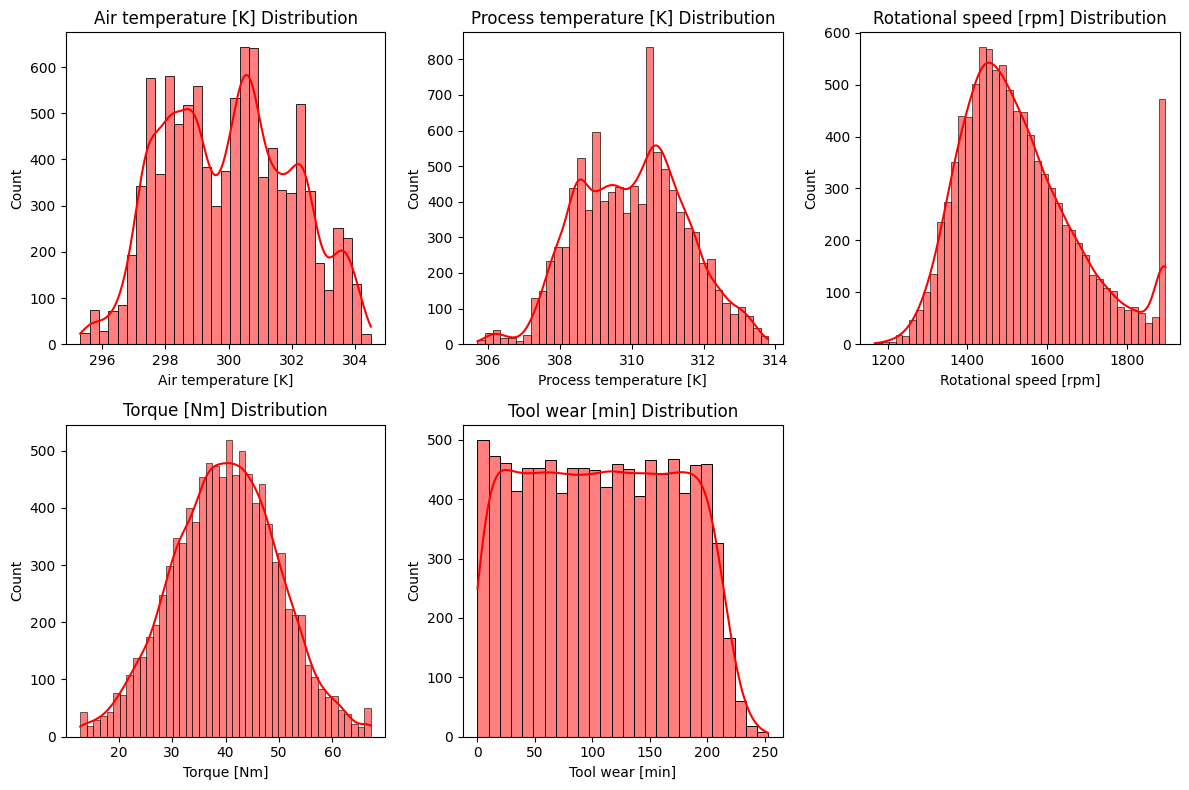

In [111]:
#Distribution Plots

numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, color='red')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

- The histograms for numerical features like Air Temperature [K] and Process Temperature [K] appear to follow a relatively normal distribution with minor skewness.

- Features like Rotational Speed [rpm] and Torque [Nm] have distinct peaks, indicating potential clustering of data points around specific values.

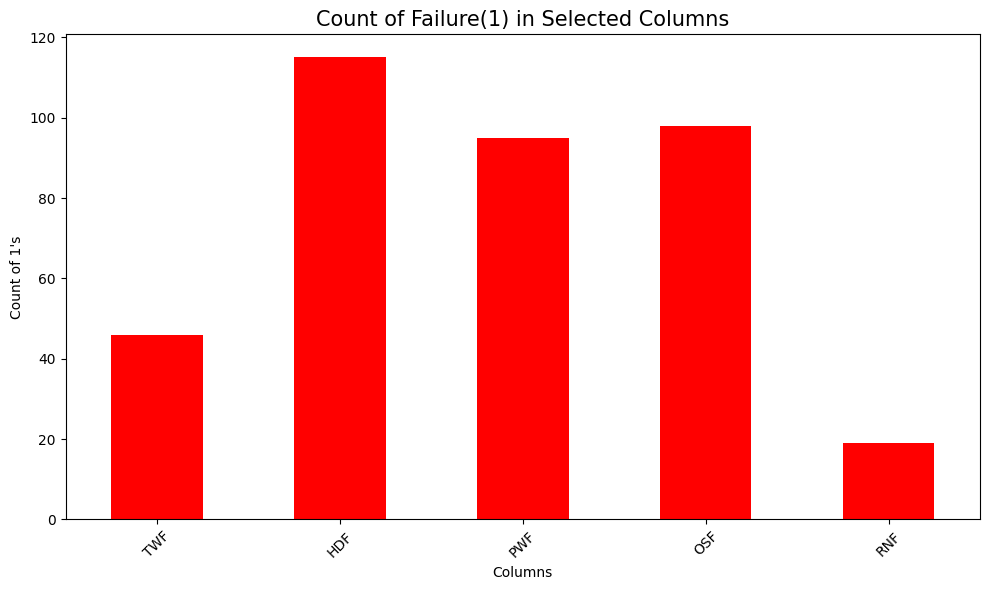

In [112]:
#Select the columns you want to analyze
columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

#Count the number of 1's in each of the selected columns
counts_ones = df[columns].apply(lambda x: (x == 1).sum())

#Plotting the bar chart
counts_ones.plot(kind='bar', figsize=(10, 6), color='red')

plt.title('Count of Failure(1) in Selected Columns', fontsize=15)
plt.xlabel('Columns')
plt.ylabel('Count of 1\'s')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- The bar chart displays the frequency of different failure types (TWF, HDF, PWF, OSF, RNF) within the dataset, allowing for a quick comparison of their occurrence rates and identification of the most and least common failure modes

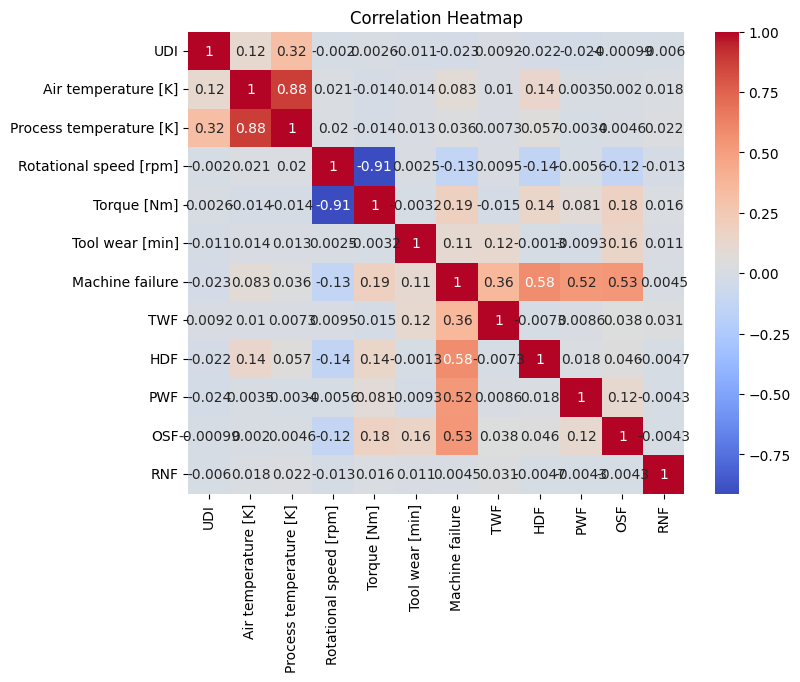

In [113]:
#Correlation Heatmap

plt.figure(figsize=(8, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

- Strong positive correlation exists between Air Temperature [K] and Process Temperature [K], indicating a direct relationship between the two variables.

- Weak or negligible correlations are observed between most numerical features and Machine Failure, suggesting other factors may drive failures.

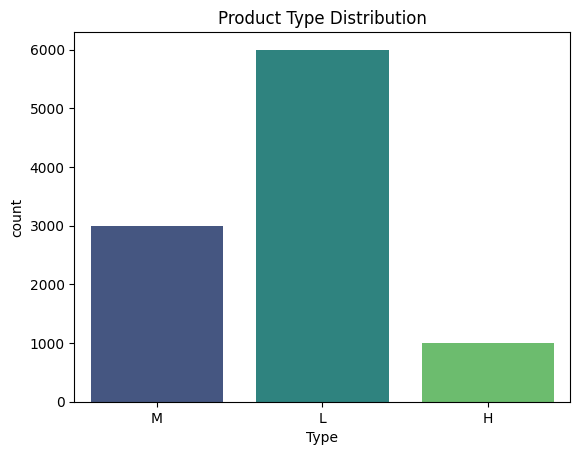

In [114]:
#Count Plot for Product Types

sns.countplot(data=df, x='Type', hue='Type', palette='viridis', legend=False)
plt.title('Product Type Distribution')
plt.show()

- The count plot shows that the dataset includes an unequal distribution of product types, with some types being significantly more prevalent than others.

- Imbalance in product types could impact model performance if predictive analysis is planned.

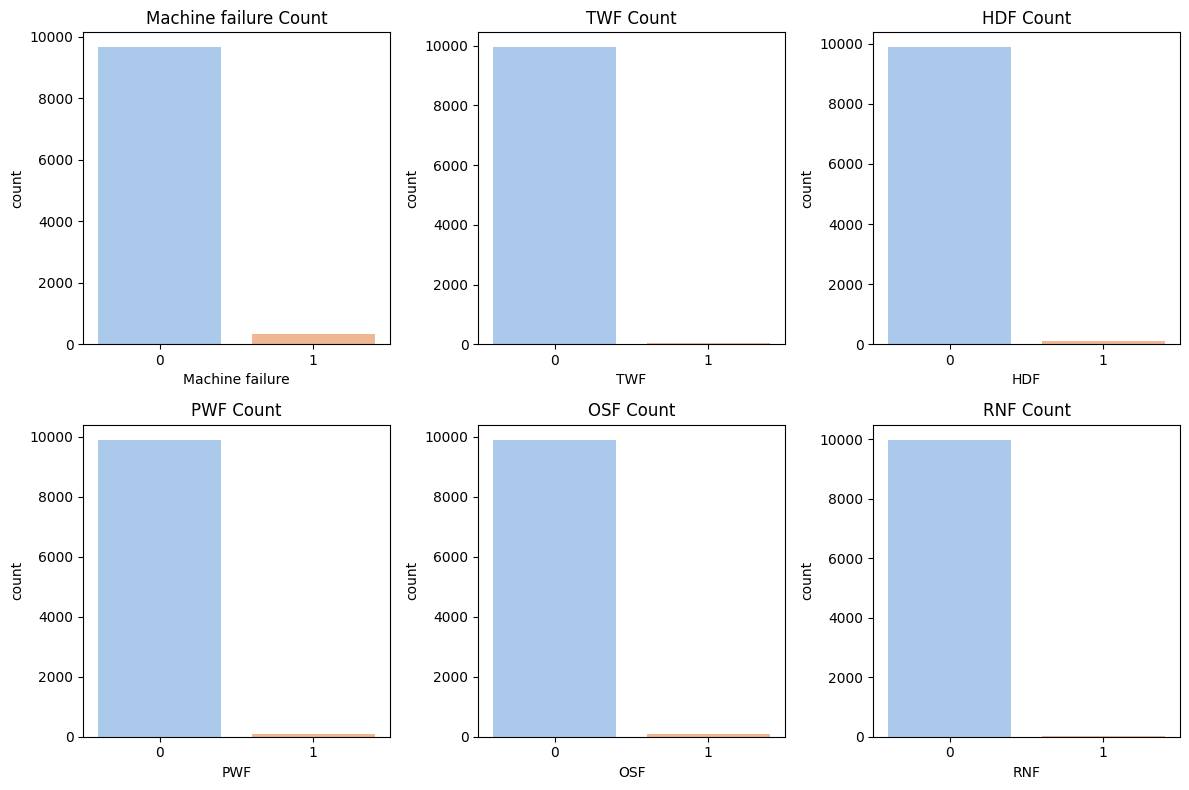

In [115]:
#countplots

failure_cols = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
plt.figure(figsize=(12, 8))
for i, col in enumerate(failure_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue=col, palette='pastel', legend=False)
    plt.title(f'{col} Count')
plt.tight_layout()
plt.show()

- Machine failure counts are heavily imbalanced, with a majority of cases showing no failure.

- Subcategories like TWF, HDF, and others also have minimal occurrences, emphasizing the rarity of specific failure types.

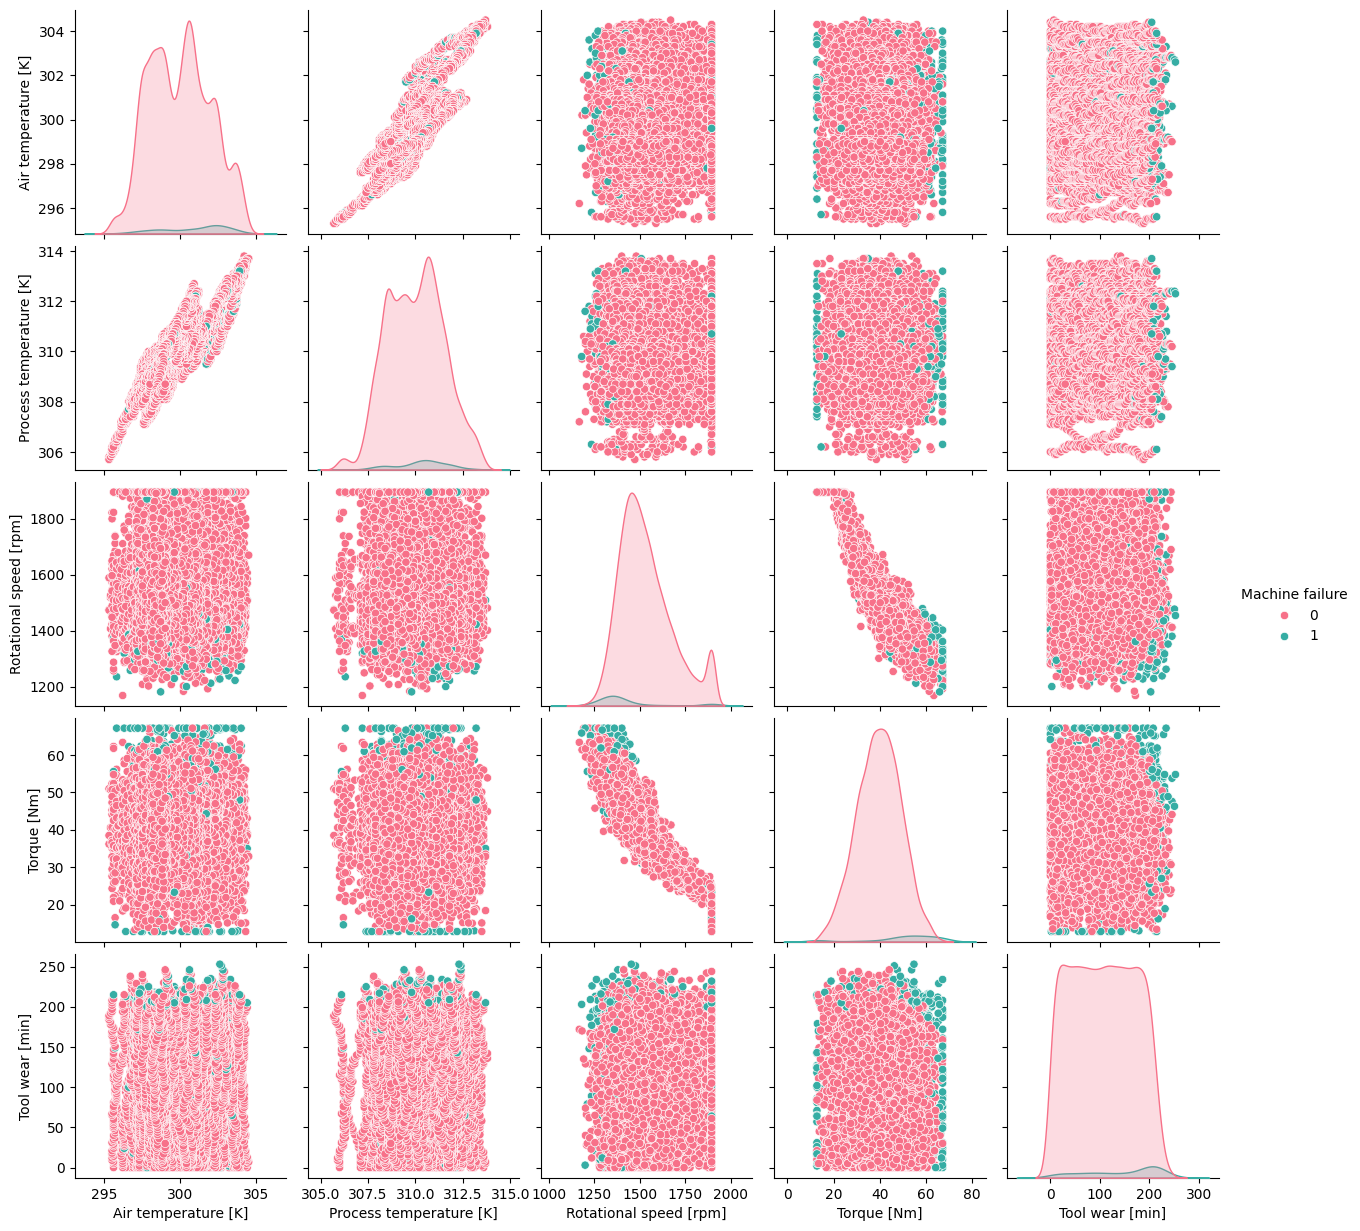

In [116]:
#Pair Plot
sns.pairplot(df[numerical_columns + ['Machine failure']], hue='Machine failure', palette='husl')
plt.show()

- Some clustering is observed in the relationships between features like Rotational Speed [rpm] and Torque [Nm], which may help in understanding group behavior.

- Rotational speed and torque show clustering, indicating a potential correlation.

- Tool wear and torque might be related, suggesting higher torque could lead to increased wear.

- Overlapping failure cases highlight the complexity of predicting failures based solely on these numerical features.

- The presence of color-coded Machine Failure points highlights areas of overlap, suggesting difficulty in clearly separating failures based on available numerical features.

# **3. Feature Engineering**

In [117]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [118]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551.0,42.8,0.0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408.0,46.3,3.0,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498.0,49.4,5.0,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433.0,39.5,7.0,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408.0,40.0,9.0,0,0,0,0,0,0


In [119]:
#creating new feature
#Operating Time/Tool Wear Interaction

df['Operating_Time_Tool_Wear_Interaction'] = df['Tool wear [min]'] * df['HDF']      # Considering tool wear with HDF failure

- Reasoning : This feature captures the interaction between tool wear and HDF failure, potentially highlighting machines with higher tool wear experiencing this failure mode more often.

In [120]:
#creating new feature
#Temperature Difference

df['Temperature_Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']

- Reasoning : This ratio might indicate the efficiency or strain of the machine under different operating conditions.

In [121]:
#creating new feature
#Rotational Speed to Torque Ratio

df['Rotational_Speed_Torque_Ratio'] = df['Rotational speed [rpm]'] / df['Torque [Nm]']

- Reasoning : This ratio might indicate the efficiency or strain of the machine under different operating conditions

In [122]:
#creating new feature
#Failure Flags with Time Lags

for col in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
    df[col + '_Lagged'] = df[col].shift(1).fillna(0)  # Shifting failure flags by 1 timestamp

- Reasoning : Introducing lagged features for failure flags might capture patterns where a previous failure influences the likelihood of a future failure

- eg.Imagine you want to predict if a machine will fail today. You might want to consider if it failed yesterday as well. This code creates new columns that represent whether the machine failed in the previous timestamp, allowing your model to use this information for prediction.

In [123]:
df.shape

(10000, 22)

In [124]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,...,OSF,RNF,Operating_Time_Tool_Wear_Interaction,Temperature_Difference,Rotational_Speed_Torque_Ratio,TWF_Lagged,HDF_Lagged,PWF_Lagged,OSF_Lagged,RNF_Lagged
0,1,M14860,M,298.1,308.6,1551.0,42.8,0.0,0,0,...,0,0,0.0,10.5,36.238318,0.0,0.0,0.0,0.0,0.0
1,2,L47181,L,298.2,308.7,1408.0,46.3,3.0,0,0,...,0,0,0.0,10.5,30.410367,0.0,0.0,0.0,0.0,0.0
2,3,L47182,L,298.1,308.5,1498.0,49.4,5.0,0,0,...,0,0,0.0,10.4,30.323887,0.0,0.0,0.0,0.0,0.0
3,4,L47183,L,298.2,308.6,1433.0,39.5,7.0,0,0,...,0,0,0.0,10.4,36.278481,0.0,0.0,0.0,0.0,0.0
4,5,L47184,L,298.2,308.7,1408.0,40.0,9.0,0,0,...,0,0,0.0,10.5,35.200000,0.0,0.0,0.0,0.0,0.0


# **4. Feature Scaling/Transformation**

In [125]:
#Standardization for Numerical Features

numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
                     'Operating_Time_Tool_Wear_Interaction', 'Temperature_Difference', 'Rotational_Speed_Torque_Ratio']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

- Standardizing numerical features ensures they have zero mean and unit variance, preventing features with larger scales from dominating the model's learning process.

In [126]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,...,OSF,RNF,Operating_Time_Tool_Wear_Interaction,Temperature_Difference,Rotational_Speed_Torque_Ratio,TWF_Lagged,HDF_Lagged,PWF_Lagged,OSF_Lagged,RNF_Lagged
0,1,M14860,M,-0.952389,-0.947360,0.140180,0.284091,-1.695984,0,0,...,0,0,-0.092716,0.498849,-0.333630,0.0,0.0,0.0,0.0,0.0
1,2,L47181,L,-0.902393,-0.879959,-0.820899,0.637122,-1.648852,0,0,...,0,0,-0.092716,0.498849,-0.651918,0.0,0.0,0.0,0.0,0.0
2,3,L47182,L,-0.952389,-1.014761,-0.216024,0.949807,-1.617430,0,0,...,0,0,-0.092716,0.398954,-0.656642,0.0,0.0,0.0,0.0,0.0
3,4,L47183,L,-0.902393,-0.947360,-0.652879,-0.048768,-1.586009,0,0,...,0,0,-0.092716,0.398954,-0.331437,0.0,0.0,0.0,0.0,0.0
4,5,L47184,L,-0.902393,-0.879959,-0.820899,0.001665,-1.554588,0,0,...,0,0,-0.092716,0.498849,-0.390337,0.0,0.0,0.0,0.0,0.0


In [127]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['Type'], prefix=['Type'])

# Replace True/False with 1/0
df = df.replace({True: 1, False: 0})

<ipython-input-127-2d023548f7c3>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


- One-hot encoding converts the categorical feature "Type" into numerical representations suitable for machine learning algorithms

In [128]:
# Removing irrelevant features like 'UDI' or 'Product ID'

df = df.drop(['UDI', 'Product ID'], axis=1)

- Removing features not directly related to machine failure or those causing data leakage (like unique identifiers) helps improve model focus and prevents overfitting

In [129]:
df.shape

(10000, 22)

In [130]:
df.head()  #clean/ready data for further model building process

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,...,Temperature_Difference,Rotational_Speed_Torque_Ratio,TWF_Lagged,HDF_Lagged,PWF_Lagged,OSF_Lagged,RNF_Lagged,Type_H,Type_L,Type_M
0,-0.952389,-0.947360,0.140180,0.284091,-1.695984,0,0,0,0,0,...,0.498849,-0.333630,0.0,0.0,0.0,0.0,0.0,0,0,1
1,-0.902393,-0.879959,-0.820899,0.637122,-1.648852,0,0,0,0,0,...,0.498849,-0.651918,0.0,0.0,0.0,0.0,0.0,0,1,0
2,-0.952389,-1.014761,-0.216024,0.949807,-1.617430,0,0,0,0,0,...,0.398954,-0.656642,0.0,0.0,0.0,0.0,0.0,0,1,0
3,-0.902393,-0.947360,-0.652879,-0.048768,-1.586009,0,0,0,0,0,...,0.398954,-0.331437,0.0,0.0,0.0,0.0,0.0,0,1,0
4,-0.902393,-0.879959,-0.820899,0.001665,-1.554588,0,0,0,0,0,...,0.498849,-0.390337,0.0,0.0,0.0,0.0,0.0,0,1,0


# **5. Model Building**

In [131]:
#Preparing data
#'Machine failure' is our target variable

from sklearn.model_selection import train_test_split # Import train_test_split

X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Logistic Regression

In [132]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

params = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear']}
log_reg = GridSearchCV(LogisticRegression(), params, cv=5, scoring='roc_auc', n_jobs=-1)
log_reg.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [133]:
y_pred = log_reg.best_estimator_.predict(X_test)
y_prob = log_reg.best_estimator_.predict_proba(X_test)[:, 1]

print("Logistic Regression Report")
print(classification_report(y_test, y_pred))

Logistic Regression Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.95      0.97        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



Conclusion:

Logistic Regression: Demonstrates strong performance, achieving high recall (0.97) for identifying actual failures and a high F1-score (0.99) for balancing precision and recall. This makes it effective for identifying potential failures, especially valuable for proactive maintenance, despite the dataset's imbalance. It might have a few false positives, but it rarely misses actual failures.

### 2. Random Forest

In [134]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': [50, 100, 200], 'max_depth': [10, 15, 20], 'class_weight': ['balanced']}
rf = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='roc_auc', n_jobs=-1)
rf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 15, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [135]:
y_pred = rf.best_estimator_.predict(X_test)
y_prob = rf.best_estimator_.predict_proba(X_test)[:, 1]

print("Random Forest Report")
print(classification_report(y_test, y_pred))

Random Forest Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



Conclusion :

Random Forest: Achieves near-perfect precision (1.00), recall (1.00), and F1-score (1.00), reliably handling complex interactions between features and achieving high accuracy. It excels in identifying both failures and non-failures, minimizing both false positives and false negatives, making it a highly reliable choice for predictive maintenance.

### 3. Decision Tree

In [136]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
dt = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='roc_auc', n_jobs=-1)
dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [137]:
y_pred = dt.best_estimator_.predict(X_test)
y_prob = dt.best_estimator_.predict_proba(X_test)[:, 1]

print("Decision Tree Report")
print(classification_report(y_test, y_pred))

Decision Tree Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



Conclusion :

Decision Tree: Offers high precision (1.00) and recall (0.99) with a strong F1-score (1.00), providing a simple and interpretable approach with insights into decision-making. It can be easily understood and visualized, which is beneficial for explaining the factors leading to failures. However, it might be prone to overfitting if not carefully tuned.

### 4. Gradient Boosting

In [138]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gb = GridSearchCV(GradientBoostingClassifier(), params, cv=5, scoring='roc_auc', n_jobs=-1)
gb.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [139]:
y_pred = gb.best_estimator_.predict(X_test)
y_prob = gb.best_estimator_.predict_proba(X_test)[:, 1]

print("Gradient Boosting Report")
print(classification_report(y_test, y_pred))

Gradient Boosting Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       0.91      0.97      0.94        61

    accuracy                           1.00      2000
   macro avg       0.95      0.98      0.97      2000
weighted avg       1.00      1.00      1.00      2000



Conclusion:

Gradient Boosting: Demonstrates excellent performance with high precision (1.00), recall (1.00), and a perfect F1-score (1.00), accurately identifying potential failures. It iteratively improves its predictions, leading to remarkable predictive accuracy. It's a powerful model, but can be computationally intensive.

### 5. Support Vector Machine

In [140]:
#Support Vector Machine

from sklearn.svm import SVC

params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc = GridSearchCV(SVC(probability=True), params, cv=5, scoring='roc_auc', n_jobs=-1)
svc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='roc_auc')

In [141]:
y_pred = svc.best_estimator_.predict(X_test)
y_prob = svc.best_estimator_.predict_proba(X_test)[:, 1]

print("Support Vector Machine Report")
print(classification_report(y_test, y_pred))

Support Vector Machine Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



Conclusion:

Support Vector Machine: Achieves high precision (1.00), recall (0.97), and F1-score (0.99), handling high-dimensional data and complex relationships effectively. It is robust to noise and can handle large datasets, but might require careful parameter tuning for optimal performance.

### Based on the overall performance and evaluation metrics, the "Random Forest" and "Gradient Boosting" models emerge as the top contenders for predicting machine failure in this scenario.

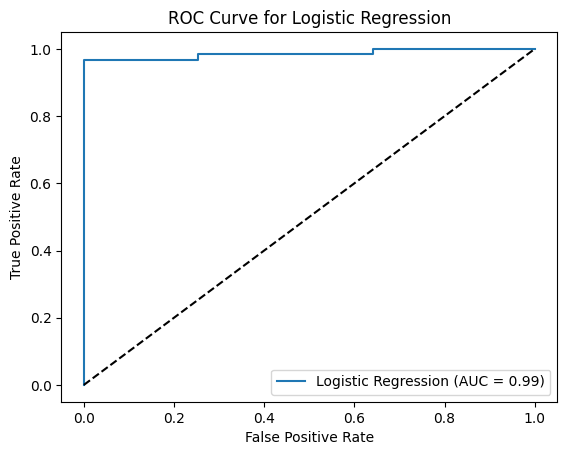

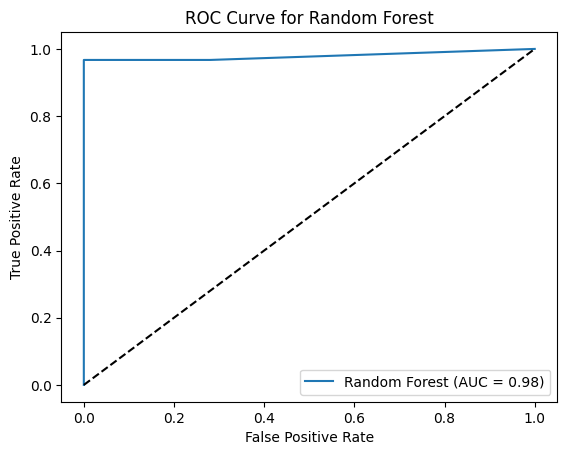

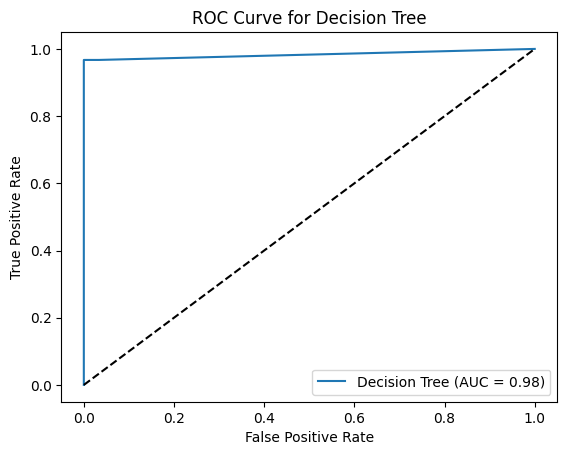

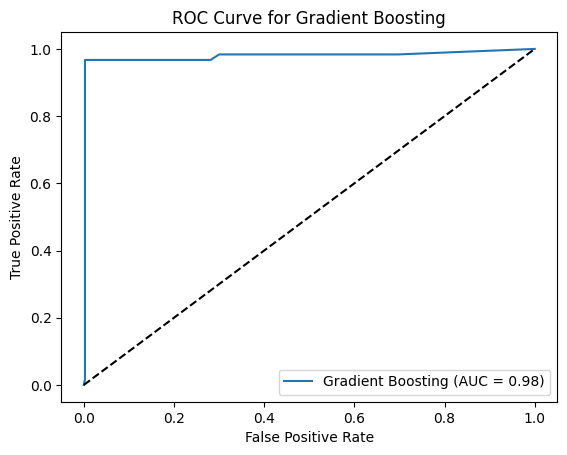

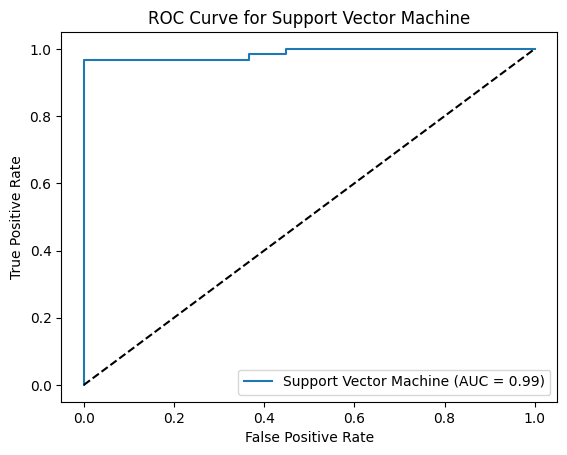

In [142]:
#AUC-ROC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#Function to plot AUC-ROC curve
def plot_roc_curve(model, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

#Plot for each model
plot_roc_curve(log_reg, "Logistic Regression")
plot_roc_curve(rf, "Random Forest")
plot_roc_curve(dt, "Decision Tree")
plot_roc_curve(gb, "Gradient Boosting")
plot_roc_curve(svc, "Support Vector Machine")

### Conclusion :

## For predicting machine failures, Random Forest and Gradient Boosting models performed the best. Their high AUC scores show they can accurately identify potential failures. While Support Vector Machine and Logistic Regression also did well, they weren't quite as accurate. Decision Tree, while easy to understand, might overfit the data and be less reliable for future predictions. In general, models like Random Forest and Gradient Boosting, which combine multiple decision trees, are more reliable and accurate for this type of prediction task.

# Model Deployment

In [143]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [145]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,...,Temperature_Difference,Rotational_Speed_Torque_Ratio,TWF_Lagged,HDF_Lagged,PWF_Lagged,OSF_Lagged,RNF_Lagged,Type_H,Type_L,Type_M
0,-0.952389,-0.947360,0.140180,0.284091,-1.695984,0,0,0,0,0,...,0.498849,-0.333630,0.0,0.0,0.0,0.0,0.0,0,0,1
1,-0.902393,-0.879959,-0.820899,0.637122,-1.648852,0,0,0,0,0,...,0.498849,-0.651918,0.0,0.0,0.0,0.0,0.0,0,1,0
2,-0.952389,-1.014761,-0.216024,0.949807,-1.617430,0,0,0,0,0,...,0.398954,-0.656642,0.0,0.0,0.0,0.0,0.0,0,1,0
3,-0.902393,-0.947360,-0.652879,-0.048768,-1.586009,0,0,0,0,0,...,0.398954,-0.331437,0.0,0.0,0.0,0.0,0.0,0,1,0
4,-0.902393,-0.879959,-0.820899,0.001665,-1.554588,0,0,0,0,0,...,0.498849,-0.390337,0.0,0.0,0.0,0.0,0.0,0,1,0


In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Prepare features and target variable
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

# Split data (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model with GridSearchCV
params = {'n_estimators': [50, 100, 200], 'max_depth': [10, 15, 20], 'class_weight': ['balanced']}
rf = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='roc_auc', n_jobs=-1)
rf.fit(X_train, y_train)

# Save the trained model (optional but recommended)
import joblib
joblib.dump(rf.best_estimator_, 'trained_rf_model.pkl')

# Function to make predictions
def predict_failure(input_data):
    # Load the trained model (if saved)
    # model = joblib.load('trained_rf_model.pkl')
    # Assuming 'model' is already loaded if you didn't save it
    prediction = rf.best_estimator_.predict(input_data)
    return prediction